# Assignment 2 Linear and Logisitic Regression

## Group: Logan Rooks, Krist Papadopoulos, Yu Liu

In [115]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
%matplotlib inline

### 1 Linear Regression

In [87]:
#Create the dataset as per the assignment code
with np.load("/Users/KP/Desktop/UfT/ECE521_Winter_2018/Assignment 2/notMNIST.npz") as data :
    Data, Target = data ["images"], data["labels"]
    posClass = 2
    negClass = 9
    dataIndx = (Target==posClass) + (Target==negClass)
    Data = Data[dataIndx]/255.
    Target = Target[dataIndx].reshape(-1, 1)
    Target[Target==posClass] = 1
    Target[Target==negClass] = 0
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data, Target = Data[randIndx], Target[randIndx]
    trainData, trainTarget = Data[:3500], Target[:3500]
    validData, validTarget = Data[3500:3600], Target[3500:3600]
    testData, testTarget = Data[3600:], Target[3600:]
    
    #reshape input data to be a training point by 784 dimensions
    trainData_rs = trainData.reshape(trainData.shape[0],-1)
    validData_rs = validData.reshape(validData.shape[0],-1)
    testData_rs =  testData.reshape(testData.shape[0],-1)

In [124]:
#Define parameters used in the model

learning_rates = [0.005,0.001,0.0001]
batch_sizes = [500, 1500, 3500]
#regularizations = [0.,0.001,0.1,1]

iterations = 20000
batch_size = 500
total_batches = int(len(trainData_rs)/batch_size)
epochs = int(iterations/total_batches)
epochs

2857

### 1.1 Quantify the Loss per Epoch for Learning Rates [0.005,0.001,0.0001] with Mini-Batch = 500 and 20000 Iterations

In [120]:
LR_1_1 = tf.Graph()
with LR_1_1.as_default():
  
    with tf.name_scope("queue-inputs"):
        
        #training inputs
        X_train_input = tf.constant(trainData_rs, dtype=tf.float32)
        
        y_train_input = tf.constant(trainTarget, dtype=tf.float32)

        X, y = tf.train.slice_input_producer([X_train_input, y_train_input], num_epochs=None)
          
        X_batch, y_batch = tf.train.batch([X, y], batch_size=500)
        
    with tf.name_scope("model"):
        
        w = tf.Variable(tf.zeros([784, 1]), name="w")
        
        b = tf.Variable(tf.zeros([1]), name="b")
        
        y_pred = tf.matmul(X_batch, w) + b
        
    with tf.name_scope("hyperparameters"):
        #No regularization
        #regularization = tf.placeholder(tf.float32, name="regularization")
        learning_rate = tf.placeholder(tf.float32, name="learning-rate")
    
    with tf.name_scope("loss-function"):
    
        loss = tf.reduce_mean(tf.square(y_pred - y_batch)) #+ regularization * tf.nn.l2_loss(w)
        
    with tf.name_scope("train"):
        
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
        
    loss_array = np.zeros([len(learning_rates),epochs+1])    
        
    for idx, i in enumerate(learning_rates):
        print('Learning Rate: {:2}'.format(i))
        
        startTime = time.time()
        with tf.Session() as sess:
            #initializie the session and global variables
            sess.run(tf.global_variables_initializer())
            
            #start input enqueue threads.
            coord = tf.train.Coordinator()
            threads = tf.train.start_queue_runners(sess=sess, coord=coord)
                 
            iter_counter = 0
                
            for j in range(iterations):
                
                _, loss_value = sess.run([optimizer,loss], feed_dict={learning_rate: i})
                
                iter_counter += 1
                    
                duration = time.time() - startTime
            
                if j == 0:
                    loss_array[idx,j] = 0
                    
                elif iter_counter % total_batches == 0:
                       
                    #print status to stdout.
                    print('Epoch: {:4}, Loss: {:5f}, Duration: {:2f}'.format(int(iter_counter/total_batches), loss_value, duration))
                        
                    loss_array[idx, int(iter_counter/total_batches)] = loss_value
                
            coord.request_stop()
            coord.join(threads)


Learning Rate: 0.005
Epoch:    1, Loss: 0.068336, Duration: 0.497511
Epoch:    2, Loss: 0.064074, Duration: 0.846245
Epoch:    3, Loss: 0.055171, Duration: 1.205920
Epoch:    4, Loss: 0.056750, Duration: 1.618166
Epoch:    5, Loss: 0.056093, Duration: 1.939897
Epoch:    6, Loss: 0.046554, Duration: 2.206628
Epoch:    7, Loss: 0.047814, Duration: 2.474728
Epoch:    8, Loss: 0.039894, Duration: 2.754920
Epoch:    9, Loss: 0.044633, Duration: 3.035910
Epoch:   10, Loss: 0.041198, Duration: 3.294434
Epoch:   11, Loss: 0.050273, Duration: 3.601233
Epoch:   12, Loss: 0.041160, Duration: 3.944828
Epoch:   13, Loss: 0.045109, Duration: 4.289321
Epoch:   14, Loss: 0.044081, Duration: 4.655472
Epoch:   15, Loss: 0.044497, Duration: 4.998328
Epoch:   16, Loss: 0.044509, Duration: 5.334840
Epoch:   17, Loss: 0.029314, Duration: 5.678564
Epoch:   18, Loss: 0.043446, Duration: 6.029752
Epoch:   19, Loss: 0.042535, Duration: 6.395143
Epoch:   20, Loss: 0.045158, Duration: 6.767807
Epoch:   21, Loss: 

### 1.1 Plot the Loss per Epoch for Learning Rates [0.005,0.001,0.0001]

Text(0.5,1,'Loss of Linear Classification for Different Learning Rates and Mini-Batch of 500')

Text(0.5,0,'Epoch')

Text(0,0.5,'Loss')

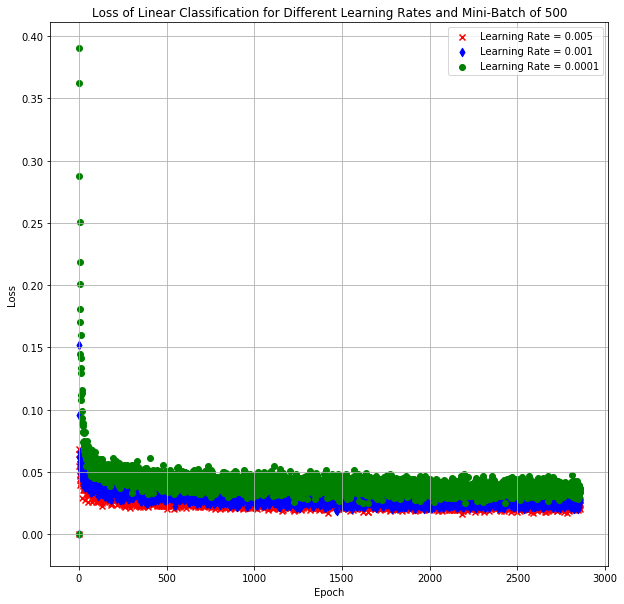

In [122]:
plt.figure(figsize=(10,10))
plt.title('Loss of Linear Classification for Different Learning Rates and Mini-Batch of 500')
    
plt.scatter(np.arange(epochs+1), loss_array[0,:], marker='x', color='r', label = 'Learning Rate = 0.005')
plt.scatter(np.arange(epochs+1), loss_array[1,:], marker='d', color='b', label = 'Learning Rate = 0.001')
plt.scatter(np.arange(epochs+1), loss_array[2,:], marker='o', color='g', label = 'Learning Rate = 0.0001')

plt.legend(loc='upper right')
    
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

The best learning rate for this problem is 0.005.  It provided faster convergence (i.e. in less epochs) to a stable minimum loss with the least variance during training.  

### 1.2 Effect of mini-batch size [500, 1500, 3500], Learning Rate = 0.005, No Regularization

In [138]:
#training with batch size of 500
LR_1_2_1 = tf.Graph()
with LR_1_2_1.as_default():
  
    with tf.name_scope("queue-inputs"):
        
        #training inputs
        X_train_input = tf.constant(trainData_rs, dtype=tf.float32)
        
        y_train_input = tf.constant(trainTarget, dtype=tf.float32)

        X, y = tf.train.slice_input_producer([X_train_input, y_train_input], num_epochs=None)
          
        X_batch, y_batch = tf.train.batch([X, y], batch_size=500)
        
    with tf.name_scope("model"):
        
        w = tf.Variable(tf.zeros([784, 1]), name="w")
        
        b = tf.Variable(tf.zeros([1]), name="b")
        
        y_pred = tf.matmul(X_batch, w) + b
        
    #with tf.name_scope("hyperparameters"):
        #No regularization
        #regularization = tf.placeholder(tf.float32, name="regularization")
        #learning_rate = tf.placeholder(tf.float32, name="learning-rate")
    
    with tf.name_scope("loss-function"):
    
        loss = tf.reduce_mean(tf.square(y_pred - y_batch)) #+ regularization * tf.nn.l2_loss(w)
        
    with tf.name_scope("train"):
        
        #Learning Rate from 1.1
        optimizer = tf.train.GradientDescentOptimizer(0.005).minimize(loss) 
        
        startTime = time.time()
        with tf.Session() as sess:
            #initializie the session and global variables
            sess.run(tf.global_variables_initializer())
            
            #start input enqueue threads.
            coord = tf.train.Coordinator()
            threads = tf.train.start_queue_runners(sess=sess, coord=coord)
                
            loss_array_mb1 = np.zeros(iterations)
            
            print('Training with Mini-Batch Size of 500')
            for j in range(iterations):
                
                _, loss_value = sess.run([optimizer,loss])
                    
                duration = time.time() - startTime
                
                loss_array_mb1[j] = loss_value
                    
                if j % 1000 == 0:
                       
                    #print status to stdout.
                    print('Iteration: {:5}, Loss: {:5f}, Duration: {:2f}'.format(j, loss_value, duration))
                
            coord.request_stop()
            coord.join(threads)

Training with Mini-Batch Size of 500
Iteration:     0, Loss: 0.450000, Duration: 0.214953
Iteration:  1000, Loss: 0.035009, Duration: 47.579536
Iteration:  2000, Loss: 0.026220, Duration: 96.111029
Iteration:  3000, Loss: 0.028608, Duration: 143.285969
Iteration:  4000, Loss: 0.028838, Duration: 190.410593
Iteration:  5000, Loss: 0.023532, Duration: 236.466475
Iteration:  6000, Loss: 0.025277, Duration: 281.805725
Iteration:  7000, Loss: 0.026535, Duration: 328.158424
Iteration:  8000, Loss: 0.022337, Duration: 374.228474
Iteration:  9000, Loss: 0.023090, Duration: 423.469102
Iteration: 10000, Loss: 0.023969, Duration: 472.525955
Iteration: 11000, Loss: 0.021897, Duration: 518.064025
Iteration: 12000, Loss: 0.025449, Duration: 563.987788
Iteration: 13000, Loss: 0.022679, Duration: 612.408915
Iteration: 14000, Loss: 0.026007, Duration: 658.787842
Iteration: 15000, Loss: 0.024067, Duration: 705.704876
Iteration: 16000, Loss: 0.022665, Duration: 752.820373
Iteration: 17000, Loss: 0.021181

In [141]:
#Last training MSE for batch size of 500
loss_array_mb1[-1]

0.022493490949273109

In [130]:
#training with batch size of 1500
LR_1_2_2 = tf.Graph()
with LR_1_2_2.as_default():
  
    with tf.name_scope("queue-inputs"):
        
        #training inputs
        X_train_input = tf.constant(trainData_rs, dtype=tf.float32)
        
        y_train_input = tf.constant(trainTarget, dtype=tf.float32)

        X, y = tf.train.slice_input_producer([X_train_input, y_train_input], num_epochs=None)
          
        X_batch, y_batch = tf.train.batch([X, y], batch_size=1500)
        
    with tf.name_scope("model"):
        
        w = tf.Variable(tf.zeros([784, 1]), name="w")
        
        b = tf.Variable(tf.zeros([1]), name="b")
        
        y_pred = tf.matmul(X_batch, w) + b
        
    #with tf.name_scope("hyperparameters"):
        #No regularization
        #regularization = tf.placeholder(tf.float32, name="regularization")
        #learning_rate = tf.placeholder(tf.float32, name="learning-rate")
    
    with tf.name_scope("loss-function"):
    
        loss = tf.reduce_mean(tf.square(y_pred - y_batch)) #+ regularization * tf.nn.l2_loss(w)
        
    with tf.name_scope("train"):
        
        #Learning Rate from 1.1
        optimizer = tf.train.GradientDescentOptimizer(0.005).minimize(loss) 
        
        startTime = time.time()
        with tf.Session() as sess:
            #initializie the session and global variables
            sess.run(tf.global_variables_initializer())
            
            #start input enqueue threads.
            coord = tf.train.Coordinator()
            threads = tf.train.start_queue_runners(sess=sess, coord=coord)
                
            loss_array_mb2 = np.zeros(iterations)
            
            print('Training with Mini-Batch Size of 1500')
            for j in range(iterations):
                
                _, loss_value = sess.run([optimizer,loss])
                    
                duration = time.time() - startTime
                
                loss_array_mb2[j] = loss_value
                    
                if j % 1000 == 0:
                       
                    #print status to stdout.
                    print('Iteration: {:5}, Loss: {:5f}, Duration: {:2f}'.format(j, loss_value, duration))
                
            coord.request_stop()
            coord.join(threads)

Training with Mini-Batch Size of 1500
Iteration:     0, Loss: 0.506000, Duration: 0.327096
Iteration:  1000, Loss: 0.032379, Duration: 138.049681
Iteration:  2000, Loss: 0.026459, Duration: 268.627287
Iteration:  3000, Loss: 0.026956, Duration: 407.043415
Iteration:  4000, Loss: 0.025759, Duration: 546.701521
Iteration:  5000, Loss: 0.026005, Duration: 687.318904
Iteration:  6000, Loss: 0.027614, Duration: 831.426969
Iteration:  7000, Loss: 0.023932, Duration: 976.428499
Iteration:  8000, Loss: 0.026092, Duration: 1122.171230
Iteration:  9000, Loss: 0.025775, Duration: 1267.869275
Iteration: 10000, Loss: 0.024121, Duration: 1410.298991
Iteration: 11000, Loss: 0.023663, Duration: 1556.269820
Iteration: 12000, Loss: 0.022613, Duration: 1700.950888
Iteration: 13000, Loss: 0.022242, Duration: 1848.458635
Iteration: 14000, Loss: 0.023540, Duration: 1996.341308
Iteration: 15000, Loss: 0.023301, Duration: 2145.175543
Iteration: 16000, Loss: 0.025108, Duration: 2292.213240
Iteration: 17000, Lo

In [137]:
#Last training MSE for batch size of 1500
loss_array_mb2[-1]

0.022442931309342384

In [142]:
#training with batch size of 3500
LR_1_2_3 = tf.Graph()
with LR_1_2_3.as_default():
  
    with tf.name_scope("queue-inputs"):
        
        #training inputs
        X_train_input = tf.constant(trainData_rs, dtype=tf.float32)
        
        y_train_input = tf.constant(trainTarget, dtype=tf.float32)

        X, y = tf.train.slice_input_producer([X_train_input, y_train_input], num_epochs=None)
          
        X_batch, y_batch = tf.train.batch([X, y], batch_size=3500)
        
    with tf.name_scope("model"):
        
        w = tf.Variable(tf.zeros([784, 1]), name="w")
        
        b = tf.Variable(tf.zeros([1]), name="b")
        
        y_pred = tf.matmul(X_batch, w) + b
        
    #with tf.name_scope("hyperparameters"):
        #No regularization
        #regularization = tf.placeholder(tf.float32, name="regularization")
        #learning_rate = tf.placeholder(tf.float32, name="learning-rate")
    
    with tf.name_scope("loss-function"):
    
        loss = tf.reduce_mean(tf.square(y_pred - y_batch)) #+ regularization * tf.nn.l2_loss(w)
        
    with tf.name_scope("train"):
        
        #Learning Rate from 1.1
        optimizer = tf.train.GradientDescentOptimizer(0.005).minimize(loss) 
        
        startTime = time.time()
        with tf.Session() as sess:
            #initializie the session and global variables
            sess.run(tf.global_variables_initializer())
            
            #start input enqueue threads.
            coord = tf.train.Coordinator()
            threads = tf.train.start_queue_runners(sess=sess, coord=coord)
                
            loss_array_mb3 = np.zeros(iterations)
            
            print('Training with Mini-Batch Size of 3500')
            for j in range(iterations):
                
                _, loss_value = sess.run([optimizer,loss])
                    
                duration = time.time() - startTime
                
                loss_array_mb3[j] = loss_value
                    
                if j % 1000 == 0:
                       
                    #print status to stdout.
                    print('Iteration: {:5}, Loss: {:5f}, Duration: {:2f}'.format(j, loss_value, duration))
                
            coord.request_stop()
            coord.join(threads)

Training with Mini-Batch Size of 3500
Iteration:     0, Loss: 0.501714, Duration: 0.505596
Iteration:  1000, Loss: 0.031042, Duration: 322.850316
Iteration:  2000, Loss: 0.028063, Duration: 663.217812
Iteration:  3000, Loss: 0.026720, Duration: 985.969939
Iteration:  4000, Loss: 0.025937, Duration: 1323.390610
Iteration:  5000, Loss: 0.025400, Duration: 1661.422540
Iteration:  6000, Loss: 0.024991, Duration: 1997.568284
Iteration:  7000, Loss: 0.024661, Duration: 2336.820591
Iteration:  8000, Loss: 0.024385, Duration: 2658.267088
Iteration:  9000, Loss: 0.024146, Duration: 2978.608660
Iteration: 10000, Loss: 0.023937, Duration: 3297.322637
Iteration: 11000, Loss: 0.023751, Duration: 3611.952480
Iteration: 12000, Loss: 0.023583, Duration: 3936.813584
Iteration: 13000, Loss: 0.023430, Duration: 4270.240389
Iteration: 14000, Loss: 0.023291, Duration: 4609.499617
Iteration: 15000, Loss: 0.023162, Duration: 4950.287319
Iteration: 16000, Loss: 0.023043, Duration: 5275.612987
Iteration: 17000

In [143]:
#Last training MSE for batch size of 3500
loss_array_mb3[-1]

0.02263987809419632

Mini-Batch: 500,  MSE: 0.0225
Mini-Batch: 1500, MSE: 0.0224
Mini-Batch: 3500, MSE: 0.0226

The best mini batch in terms of training time is 500.  For this size of mini-batch, the minimum MSE error that is reached by all cases (~0.022) after 20,000 iterations takes significantly less training time (e.g. ~ 3 X less time than mini-batch of 1500 and ~ 9 X less time than 3500).  Therefore using a smaller mini-batch is effective in reaching the minimum MSE in a shorter duration compared to training with more data in the batches.